# Project 2: Investigating the relationship between development finance and carbon emissions

Indonesia is a fascinating case for exploring the unintended consequences of development finance. While international funding often aims to boost economic growth and improve livelihoods, it can also have environmental side effects—like an increase in carbon emissions.

Using publicly available data on international development finance and carbon emissions in Indonesia, I performed a rudimentary analysis to uncover how financial inflows correlate with changes in greenhouse gas outputs. 

I wanted to know: Does more development finance lead to higher emissions, or can it support greener growth? My hypothesis is that in general, development finance leads to higher economic growth, which increases emission intensity. 

## I. About the Data

### Dataset 1: oecd_finance
The first dataset focuses on development finance receipts in Indonesia, sourced from DAC countries. It includes total financial inflows measured in current prices and reported in millions of US dollars, from the period 1960 - 2022. The only filter I performed was filtering for recipient country on the OECD website. 

Dataset link: https://data-explorer.oecd.org/vis?fs[0]=Topic%2C1%7CDevelopment%23DEV%23%7COfficial%20Development%20Assistance%20%28ODA%29%23DEV_ODA%23&fs[1]=Topic%2C2%7CDevelopment%23DEV%23%7COfficial%20Development%20Assistance%20%28ODA%29%23DEV_ODA%23%7CFlows%20by%20provider%20and%20recipient%23DEV_ODA_FPR%23&pg=0&fc=Topic&snb=7&vw=tb&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_DAC2%40DF_RECPTS&df[ag]=OECD.DCD.FSD&df[vs]=1.1&dq=DAC.IDN..USD.&pd=%2C&to[TIME_PERIOD]=false

### Dataset 2: emission_intensity
The second dataset shows CO2 emissons per capita in Indonesia, from the period 2000 - 2022. No filter was performed on the data.

Dataset link: https://www.iea.org/countries/indonesia/emissions

## II. Data Manipulation

### 1. Import modules and read data

In [20]:
import pandas as pd
import plotly.express as px

filex_path = '/Users/wanqi/Desktop/oecd_finance.csv'
filey_path = '/Users/wanqi/Desktop/emission_intensity.csv'

In [21]:
finance_data = pd.read_csv(filex_path)
finance_data.info()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/wanqi/Desktop/oecd_finance.csv'

In [ ]:
emissions_data = pd.read_csv(filey_path)
emissions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 23 non-null     int64  
 1   CO2 emissions per capita, Indonesia  23 non-null     float64
 2   Units                                23 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 684.0+ bytes


### 2. Data cleaning

In [ ]:
selected_columns = ['TIME_PERIOD', 'OBS_VALUE']
finance_data = finance_data[selected_columns].sort_values('TIME_PERIOD')
finance_data.head()

,TIME_PERIOD,OBS_VALUE
56,1960,81.06
57,1961,109.95
58,1962,152.94
59,1963,104.33
60,1964,63.24


Though both datasets appeared to be clean, I still performed manipulations to change years to int and values to float.

In [ ]:
finance_data['TIME_PERIOD'] = finance_data['TIME_PERIOD'].astype(int)
finance_data['OBS_VALUE'] = finance_data['OBS_VALUE'].fillna(0).astype(float)
finance_data = finance_data.rename(columns={'TIME_PERIOD' : 'Year','OBS_VALUE' : 'ODA received in USD millions'})
finance_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 56 to 2
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          63 non-null     int64  
 1   ODA received in USD millions  63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.5 KB


In [ ]:
emissions_data = emissions_data[['Year','CO2 emissions per capita, Indonesia']].sort_values('Year')
emissions_data['Year'] = emissions_data['Year'].astype(int)
emissions_data['CO2 emissions per capita, Indonesia'] = emissions_data['CO2 emissions per capita, Indonesia'].fillna(0).astype(float)
emissions_data = emissions_data.rename(
    columns={'CO2 emissions per capita, Indonesia' : 'CO2 emissions per capita in tCO2/Capita'}
)
emissions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Year                                     23 non-null     int64  
 1   CO2 emissions per capita in tCO2/Capita  23 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 500.0 bytes


### 3. Data Merging

In [ ]:
indo_data = pd.merge(finance_data, emissions_data, on='Year', how='inner')
indo_data

,Year,ODA received in USD millions,CO2 emissions per capita in tCO2/Capita
0,2000,1532.880000,1.191
1,2001,-81.170000,1.263
2,2002,101.600000,1.272
3,2003,4622.500000,1.384
4,2004,389.860000,1.398
5,2005,8040.480000,1.388
6,2006,3146.740000,1.462
7,2007,1101.730000,1.512
8,2008,2055.300000,1.473
9,2009,3965.290000,1.518


## III. Data Visualization

In [ ]:
import plotly.io as pio
pio.renderers.default = "vscode+jupyterlab+notebook_connected"

### 1. Visualization for individual datasets

I first made a scatterplot of the finance data from 2000 - 2022 to observe trends across time. Generally, ODA to Indonesia has increased from 2000-2022, save for the steep drop during COVID.

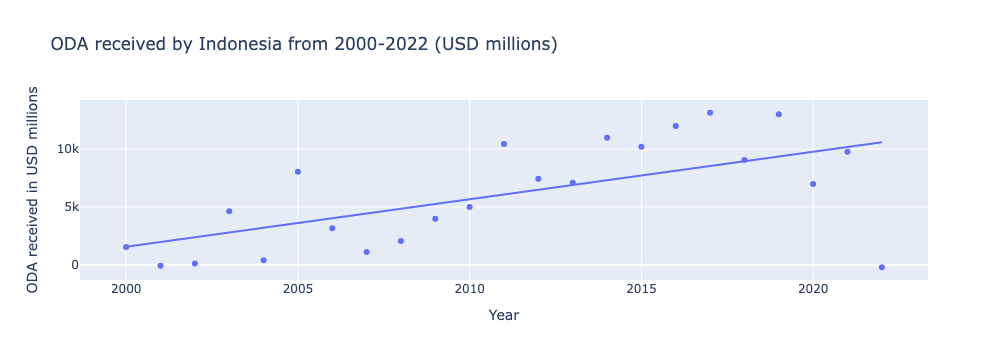

In [ ]:
fig1 = px.scatter(
    indo_data,
    x='Year',
    y='ODA received in USD millions',
    title='ODA received by Indonesia from 2000-2022 (USD millions)',
    trendline="ols",
)

fig1.show()

I then made a scatterplot of the emissions intensity data from 2000 - 2022 to observe trends across time. Generally, emissions intensity in Indonesia increased steadily from 2000 to 2022, showing much less fluctuations than development finance.

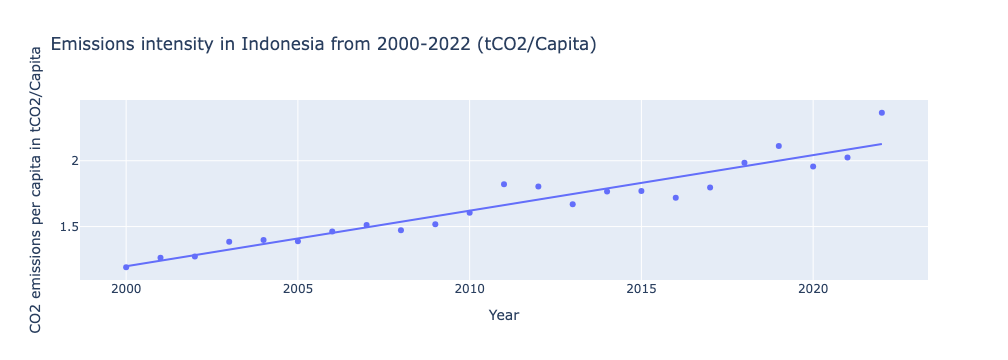

In [ ]:
fig2 = px.scatter(
    indo_data,
    x='Year',
    y='CO2 emissions per capita in tCO2/Capita',
    title='Emissions intensity in Indonesia from 2000-2022 (tCO2/Capita)',
    trendline="ols",
)

fig2.show()

### 2. Visualization for combined dataset

I then plotted the two datasets against each other, also adjusting for better visual clarity and readability.

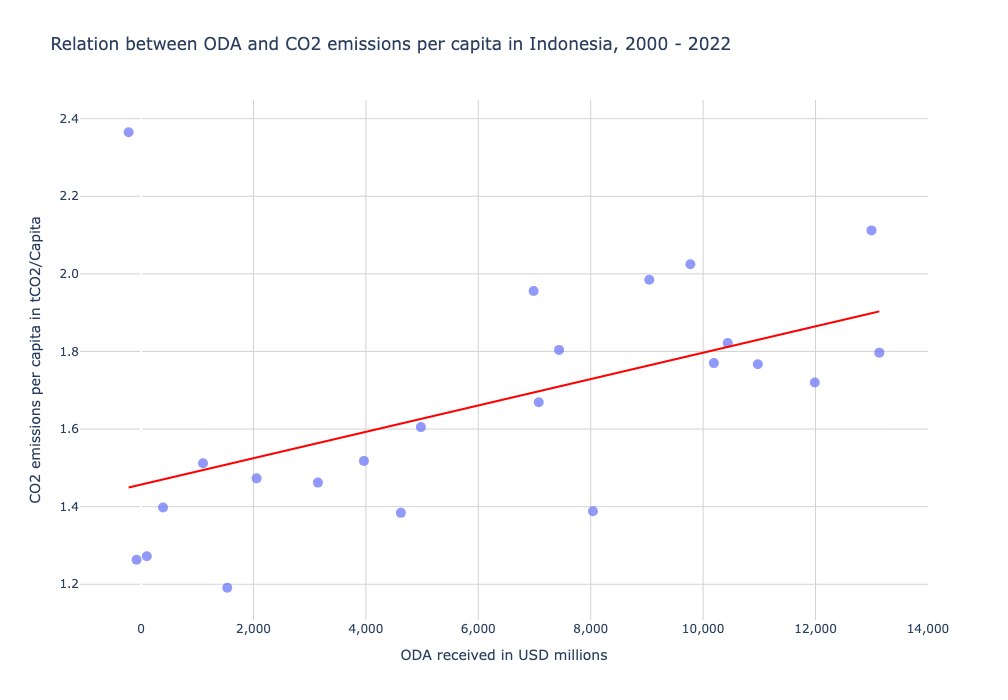

In [ ]:
fig3 = px.scatter(
    indo_data,
    x='ODA received in USD millions',
    y='CO2 emissions per capita in tCO2/Capita',
    title='Relation between ODA and CO2 emissions per capita in Indonesia, 2000 - 2022',
    trendline="ols",
    height=700,  
    width=700
)

fig3.update_traces(marker=dict(size=10, opacity=0.7), line=dict(color="red")) 

fig3.update_layout(
    xaxis=dict(
        tickformat=",",  
        title=dict(font=dict(size=14)),
        gridcolor="lightgray"
    ),
    yaxis=dict(
        tickformat=".1f",  # One decimal point
        title=dict(font=dict(size=14)),
        gridcolor="lightgray"
    ),
    plot_bgcolor="white",  
)

fig3.show()

As expected, the two factors share a positive correlation, contributing (though not confirming) to my hypothesis.

# Extra research: Regional Comparison

Plotting two factors against each other only shows correlation, not causation, so it’s hard to draw meaningful conclusions. To dig deeper, I want to compare ODA-CO2 data across different regions. My hypothesis is that in certain regions, such as higher-income ones, the relationship between ODA and CO2 emissions might be weaker due to greater resources for cleaner technologies, while in others, ODA might be more closely tied to emissions-intensive development activities.

## I. About the Data

### Dataset 3: region_finance

Contains data on total OECD-measured international finance receipts received by all recipient developing countries, grouped into 4 regions: Africa, Asia, Europe and America.

Dataset link: https://data-explorer.oecd.org/vis?fs[0]=Topic%2C1%7CDevelopment%23DEV%23%7COfficial%20Development%20Assistance%20%28ODA%29%23DEV_ODA%23&fs[1]=Topic%2C2%7CDevelopment%23DEV%23%7COfficial%20Development%20Assistance%20%28ODA%29%23DEV_ODA%23%7CFlows%20by%20provider%20and%20recipient%23DEV_ODA_FPR%23&fs[2]=Measure%2C0%7CTotal%20receipts%23510%23&pg=0&fc=Measure&snb=1&vw=tb&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_DAC2%40DF_RECPTS&df[ag]=OECD.DCD.FSD&df[vs]=1.1&dq=DAC.S%2BA%2BF%2BE.510.USD.&pd=%2C&to[TIME_PERIOD]=false

### Dataset 4: region_emissions

Contains data on Carbon intensity of GDP (kg CO2e per 2021 PPP $ of GDP) per country/region, ungrouped.

Dataset link: https://data.worldbank.org/indicator/EN.GHG.CO2.RT.GDP.PP.KD

# II. Data Manipulation

### 1. Import and read datasets

In [ ]:
filepath3 = '/Users/wanqi/Desktop/region_finance.csv'
filepath4 = '/Users/wanqi/Desktop/region_emissions.csv'

region_finance = pd.read_csv(filepath3)
region_emissions = pd.read_csv(filepath4)

In [ ]:
region_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STRUCTURE           252 non-null    object 
 1   STRUCTURE_ID        252 non-null    object 
 2   STRUCTURE_NAME      252 non-null    object 
 3   ACTION              252 non-null    object 
 4   DONOR               252 non-null    object 
 5   Donor               252 non-null    object 
 6   RECIPIENT           252 non-null    object 
 7   Recipient           252 non-null    object 
 8   MEASURE             252 non-null    int64  
 9   Measure             252 non-null    object 
 10  UNIT_MEASURE        252 non-null    object 
 11  Unit of measure     252 non-null    object 
 12  PRICE_BASE          252 non-null    object 
 13  Price base          252 non-null    object 
 14  TIME_PERIOD         252 non-null    int64  
 15  Time period         0 non-null      float64
 16  OBS_VALU

In [ ]:
region_emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

## 2. Data cleaning for region_emissions dataset

I first want to tidy up the region_emissions dataset, because it contians both countries and region groups that, upon inspection, do not share the same grouping criteria as the four regions in the regions_finance dataset. I only want rows under column 'Country Name' that contains the region names in the regions_finance dataset.

In [ ]:
#Define region names in regions_finance dataset
region_names = [i for i in region_finance['Recipient'].unique()]
region_names

['Africa', 'Asia', 'Europe', 'America']

In [ ]:
#Filter region_emissions for rows where 'Country Name' contains any of the region names
region_emissions_filtered = region_emissions[
    region_emissions['Country Name'].str.contains('|'.join(region_names), case=False, na=False)
]
region_emissions_filtered

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,Africa Eastern and Southern,AFE,Carbon intensity of GDP (kg CO2e per 2021 PPP ...,EN.GHG.CO2.RT.GDP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.267760,0.252774,0.248533,0.245539,0.241637,0.239519,0.218904,0.213645,0.203193,NaN
3,Africa Western and Central,AFW,Carbon intensity of GDP (kg CO2e per 2021 PPP ...,EN.GHG.CO2.RT.GDP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.104012,0.100540,0.104685,0.102660,0.104986,0.106821,0.104690,0.107010,0.103558,NaN
11,American Samoa,ASM,Carbon intensity of GDP (kg CO2e per 2021 PPP ...,EN.GHG.CO2.RT.GDP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,Central African Republic,CAF,Carbon intensity of GDP (kg CO2e per 2021 PPP ...,EN.GHG.CO2.RT.GDP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.034997,0.048028,0.047864,0.047190,0.047670,0.048868,0.049150,0.050908,0.047618,NaN
36,Central Europe and the Baltics,CEB,Carbon intensity of GDP (kg CO2e per 2021 PPP ...,EN.GHG.CO2.RT.GDP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.214625,0.209404,0.206844,0.204884,0.194127,0.177069,0.171182,0.174318,0.164749,NaN
61,East Asia & Pacific (excluding high income),EAP,Carbon intensity of GDP (kg CO2e per 2021 PPP ...,EN.GHG.CO2.RT.GDP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.478857,0.446379,0.421172,0.405025,0.400630,0.390044,0.391718,0.384959,0.372799,NaN
63,East Asia & Pacific,EAS,Carbon intensity of GDP (kg CO2e per 2021 PPP ...,EN.GHG.CO2.RT.GDP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.410424,0.387468,0.370149,0.358258,0.354558,0.346672,0.348164,0.343052,0.333465,NaN
64,Europe & Central Asia (excluding high income),ECA,Carbon intensity of GDP (kg CO2e per 2021 PPP ...,EN.GHG.CO2.RT.GDP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.271144,0.250897,0.255081,0.251302,0.247775,0.235393,0.236165,0.229371,0.225697,NaN
65,Europe & Central Asia,ECS,Carbon intensity of GDP (kg CO2e per 2021 PPP ...,EN.GHG.CO2.RT.GDP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.184823,0.181540,0.178506,0.175521,0.172103,0.165567,0.163128,0.163832,0.158530,NaN
73,European Union,EUU,Carbon intensity of GDP (kg CO2e per 2021 PPP ...,EN.GHG.CO2.RT.GDP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.145753,0.145211,0.142720,0.139832,0.133870,0.125119,0.120290,0.121653,0.116623,NaN


I only want the regions with the phrase 'IDA and IBRD countries', as it is likely that this overlaps with the recipients that OECD tracks.

In [ ]:
final_emissions_data = region_emissions_filtered[
     region_emissions_filtered['Country Name'].str.contains(r'\(IDA & IBRD countries\)', na=False)
]
final_emissions_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
230,East Asia & Pacific (IDA & IBRD countries),TEA,Carbon intensity of GDP (kg CO2e per 2021 PPP ...,EN.GHG.CO2.RT.GDP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.478899,0.446414,0.421204,0.405057,0.400662,0.390075,0.391749,0.384990,0.372829,NaN
231,Europe & Central Asia (IDA & IBRD countries),TEC,Carbon intensity of GDP (kg CO2e per 2021 PPP ...,EN.GHG.CO2.RT.GDP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.286952,0.281287,0.279164,0.276354,0.274457,0.268723,0.264727,0.265730,0.262031,NaN
236,Latin America & the Caribbean (IDA & IBRD coun...,TLA,Carbon intensity of GDP (kg CO2e per 2021 PPP ...,EN.GHG.CO2.RT.GDP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.152676,0.151956,0.150419,0.147205,0.141081,0.141188,0.137921,0.140705,0.137145,NaN
238,Middle East & North Africa (IDA & IBRD countries),TMN,Carbon intensity of GDP (kg CO2e per 2021 PPP ...,EN.GHG.CO2.RT.GDP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.323723,0.317483,0.305806,0.311579,0.312672,0.302382,0.297086,0.301934,0.293363,NaN
241,Sub-Saharan Africa (IDA & IBRD countries),TSS,Carbon intensity of GDP (kg CO2e per 2021 PPP ...,EN.GHG.CO2.RT.GDP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.193654,0.184047,0.184353,0.181910,0.180730,0.180045,0.167220,0.165527,0.158195,NaN


Now, I will rename the regions to make it align with that in the region_finance dataset, assuming that the implications of the differences in grouping methodologies are negligible (in an ideal situation I would be getting a country-region matching list and sorting everything by myself but in the interest of time, sacrifices will have to be made). 

In [ ]:
# Filter rows for Middle East & North Africa and Sub-Saharan Africa
africa_rows = final_emissions_data[
    final_emissions_data['Country Name'].isin([
        "Middle East & North Africa (IDA & IBRD countries)",
        "Sub-Saharan Africa (IDA & IBRD countries)"
    ])
]

# Combine the two rows into one by summing numeric columns
combined_africa_row = africa_rows.drop(columns=['Country Name']).sum()

# Add back the "Country Name" as "Africa"
combined_africa_row['Country Name'] = "Africa"

# Convert the combined row to a DataFrame with Country Name as first column
combined_africa_row = pd.DataFrame([combined_africa_row])
combined_africa_row = combined_africa_row[['Country Name'] + [col for col in combined_africa_row.columns if col != 'Country Name']]

# Display the combined row
combined_africa_row

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Africa,TMNTSS,Carbon intensity of GDP (kg CO2e per 2021 PPP ...,EN.GHG.CO2.RT.GDP.PP.KDEN.GHG.CO2.RT.GDP.PP.KD,0.0,0.0,0.0,0.0,0.0,0.0,...,0.517377,0.50153,0.490159,0.493488,0.493401,0.482427,0.464306,0.467461,0.451558,0.0


Add Africa back to the final_emissions_data set and change names of other regions.

In [ ]:
final_emissions_data = final_emissions_data.drop(index=[238, 241])

# Append the combined Africa row
final_emissions_data = pd.concat([final_emissions_data, combined_africa_row], ignore_index=True)

# Change names of other regions
final_emissions_data.loc[0, 'Country Name'] = "Asia"
final_emissions_data.loc[1, 'Country Name'] = "Europe"
final_emissions_data.loc[2, 'Country Name'] = "America"

# Display the updated DataFrame
final_emissions_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Asia,TEA,Carbon intensity of GDP (kg CO2e per 2021 PPP ...,EN.GHG.CO2.RT.GDP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.478899,0.446414,0.421204,0.405057,0.400662,0.390075,0.391749,0.384990,0.372829,NaN
1,Europe,TEC,Carbon intensity of GDP (kg CO2e per 2021 PPP ...,EN.GHG.CO2.RT.GDP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.286952,0.281287,0.279164,0.276354,0.274457,0.268723,0.264727,0.265730,0.262031,NaN
2,America,TLA,Carbon intensity of GDP (kg CO2e per 2021 PPP ...,EN.GHG.CO2.RT.GDP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.152676,0.151956,0.150419,0.147205,0.141081,0.141188,0.137921,0.140705,0.137145,NaN
3,Africa,TMNTSS,Carbon intensity of GDP (kg CO2e per 2021 PPP ...,EN.GHG.CO2.RT.GDP.PP.KDEN.GHG.CO2.RT.GDP.PP.KD,0.0,0.0,0.0,0.0,0.0,0.0,...,0.517377,0.501530,0.490159,0.493488,0.493401,0.482427,0.464306,0.467461,0.451558,0.0


Simplify dataset to only contain Name and carbon intensity values.

In [ ]:
final_emissions_data.columns = final_emissions_data.columns.str.strip()
region_emissions = final_emissions_data.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])
region_emissions

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.478899,0.446414,0.421204,0.405057,0.400662,0.390075,0.391749,0.384990,0.372829,NaN
1,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.286952,0.281287,0.279164,0.276354,0.274457,0.268723,0.264727,0.265730,0.262031,NaN
2,America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.152676,0.151956,0.150419,0.147205,0.141081,0.141188,0.137921,0.140705,0.137145,NaN
3,Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.517377,0.501530,0.490159,0.493488,0.493401,0.482427,0.464306,0.467461,0.451558,0.0


## 3. Data cleaning for region_finance dataset

In [ ]:
region_finance.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,DONOR,Donor,RECIPIENT,Recipient,MEASURE,Measure,...,OBS_VALUE,Observation value,BASE_PER,Base period,UNIT_MULT,Unit multiplier,FLOW_TYPE,Flow type,OBS_STATUS,Observation status
0,DATAFLOW,OECD.DCD.FSD:DSD_DAC2@DF_RECPTS(1.1),Receipts by country and region,I,DAC,DAC countries,F,Africa,510,Total receipts,...,27756.812028,NaN,NaN,NaN,6,Millions,_Z,Not applicable,A,Normal value
1,DATAFLOW,OECD.DCD.FSD:DSD_DAC2@DF_RECPTS(1.1),Receipts by country and region,I,DAC,DAC countries,F,Africa,510,Total receipts,...,55531.748681,NaN,NaN,NaN,6,Millions,_Z,Not applicable,A,Normal value
2,DATAFLOW,OECD.DCD.FSD:DSD_DAC2@DF_RECPTS(1.1),Receipts by country and region,I,DAC,DAC countries,F,Africa,510,Total receipts,...,47592.312380,NaN,NaN,NaN,6,Millions,_Z,Not applicable,A,Normal value
3,DATAFLOW,OECD.DCD.FSD:DSD_DAC2@DF_RECPTS(1.1),Receipts by country and region,I,DAC,DAC countries,F,Africa,510,Total receipts,...,10748.760000,NaN,NaN,NaN,6,Millions,_Z,Not applicable,A,Normal value
4,DATAFLOW,OECD.DCD.FSD:DSD_DAC2@DF_RECPTS(1.1),Receipts by country and region,I,DAC,DAC countries,F,Africa,510,Total receipts,...,9881.810000,NaN,NaN,NaN,6,Millions,_Z,Not applicable,A,Normal value


In [ ]:
selected_columns = ['Recipient','TIME_PERIOD', 'OBS_VALUE']
region_finance = region_finance[selected_columns].sort_values('Recipient')
region_finance

,Recipient,TIME_PERIOD,OBS_VALUE
0,Africa,2020,27756.812028
34,Africa,2015,52247.451511
35,Africa,2016,39557.145833
36,Africa,2017,70766.736176
37,Africa,2018,43098.131652
...,...,...,...
160,Europe,2015,5723.882839
159,Europe,2014,10641.178021
158,Europe,2013,18473.768097
171,Europe,1973,1331.330000


## 4. Data Merging

In [ ]:
# Ensure all column names are strings before stripping
region_finance.columns = region_finance.columns.map(str).str.strip()
emissions_long.columns = emissions_long.columns.map(str).str.strip()

# Rename columns for alignment
emissions_long = emissions_long.rename(columns={"Year": "TIME_PERIOD"})
emissions_long = emissions_long.rename(columns={"Country Name": "Recipient"})

region_finance["TIME_PERIOD"] = region_finance["TIME_PERIOD"].astype(str)
emissions_long["TIME_PERIOD"] = emissions_long["TIME_PERIOD"].astype(str)

region_data = pd.merge(
    region_finance,
    emissions_long,
    on=["Recipient", "TIME_PERIOD"],
    how="inner"
)

region_data = region_data.rename(columns={
    "Recipient": "Region",
    "TIME_PERIOD": "Year",
    "OBS_VALUE": "Receipts in USD millions"
})

region_data

,Region,Year,Receipts in USD millions,Emissions (kg CO2 per GDP)
0,Africa,2020,27756.812028,0.464306
1,Africa,2015,52247.451511,0.501530
2,Africa,2016,39557.145833,0.490159
3,Africa,2017,70766.736176,0.493488
4,Africa,2018,43098.131652,0.493401
...,...,...,...,...
247,Europe,2015,5723.882839,0.281287
248,Europe,2014,10641.178021,0.286952
249,Europe,2013,18473.768097,0.300368
250,Europe,1973,1331.330000,NaN


# 4. Data Visualization

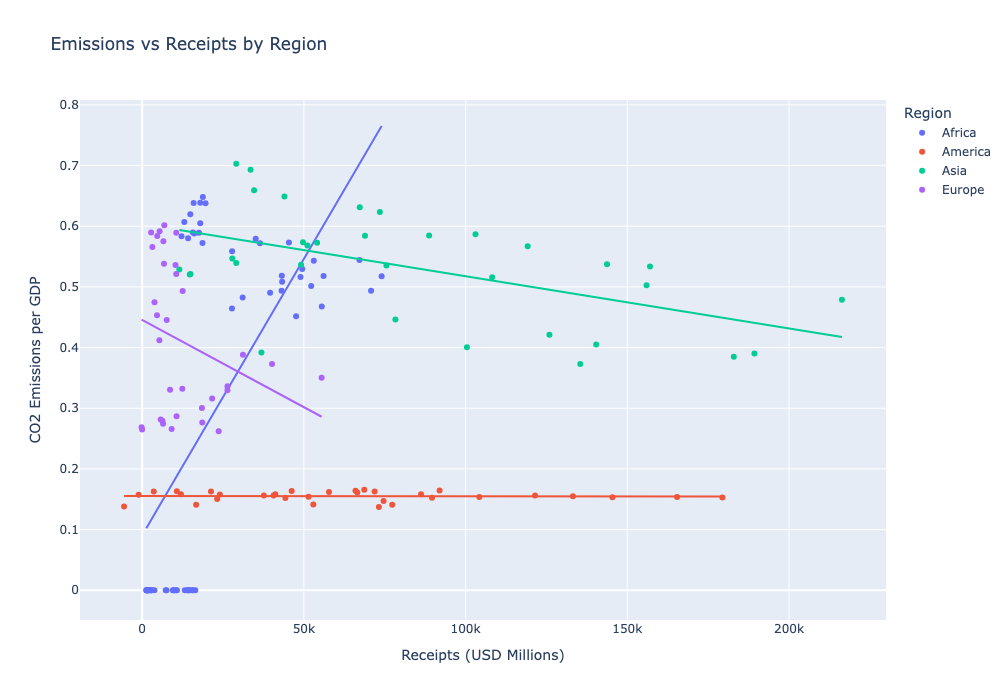

In [ ]:
fig = px.scatter(
    region_data,
    x="Receipts in USD millions",
    y="Emissions (kg CO2 per GDP)",
    color="Region",  
    hover_data=["Year"],  
    title="Emissions vs Receipts by Region",
    labels={
        "Receipts in USD millions": "Receipts (USD Millions)",
        "Emissions (kg CO2 per GDP)": "CO2 Emissions per GDP"
    },
    trendline="ols",
    height=700,  
    width=700
)

fig.show()

This is surprising stuff, and the correlation shown here is markedly different from that show in Indonesia. In Africa, a strong positive correlation suggests that increased finance may be linked to emissions-intensive industrialization or fossil fuel use. Asia and Europe show negative correlations, indicating that higher finance aligns with lower emissions intensity, potentially due to investments in green technologies and energy efficiency. Meanwhile, America displays little correlation, reflecting a decoupling of finance and emissions intensity. These differences likely stem from varying economic development levels, policy priorities, and the types of projects funded across regions. However, again, it is hard to make causal conclusions based on visual representations alone. 